### Description of data

The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately.

The datset contains the following fields:

- key - a unique identifier for each trip
- fare_amount - the cost of each trip in usd
- pickup_datetime - date and time when the meter was engaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
df = pd.read_csv('uber.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


**step2: data cleaning(Handling missing values)**

In [3]:
#dropping the rows named 'Unnamed' and 'key'
df = df.drop(['Unnamed: 0','key'],axis=1)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [5]:
df.shape

(200000, 7)

In [6]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [7]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

### Handling Null values

***missing values in 'dropoff_longitude' & 'dropoff_latitude'***

In [8]:
#Filling missing values with mean

df['dropoff_longitude'] = df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean())
df['dropoff_latitude'] = df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean())

In [9]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

**Lets change the type of pickup_datetime from object to DateTime**

In [10]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

df['year'] = df.pickup_datetime.dt.year
df['month'] = df.pickup_datetime.dt.month
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour

In [11]:
df = df.drop('pickup_datetime',axis=1)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17


In [12]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int32
month                  int32
weekday                int32
hour                   int32
dtype: object

### Exploratory Data Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  200000 non-null  float64
 4   dropoff_latitude   200000 non-null  float64
 5   passenger_count    200000 non-null  int64  
 6   year               200000 non-null  int32  
 7   month              200000 non-null  int32  
 8   weekday            200000 non-null  int32  
 9   hour               200000 non-null  int32  
dtypes: float64(5), int32(4), int64(1)
memory usage: 12.2 MB


In [14]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,2011.742440,6.281795,3.048425,13.491335
std,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997,1.856397,3.438925,1.946946,6.515531
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,2009.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,2010.000000,3.000000,1.000000,9.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2012.000000,6.000000,3.000000,14.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,2013.000000,9.000000,5.000000,19.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,2015.000000,12.000000,6.000000,23.000000


**Let's see the statistical analysis of the dataset**

### Histogram: Distribution of Fare Amount

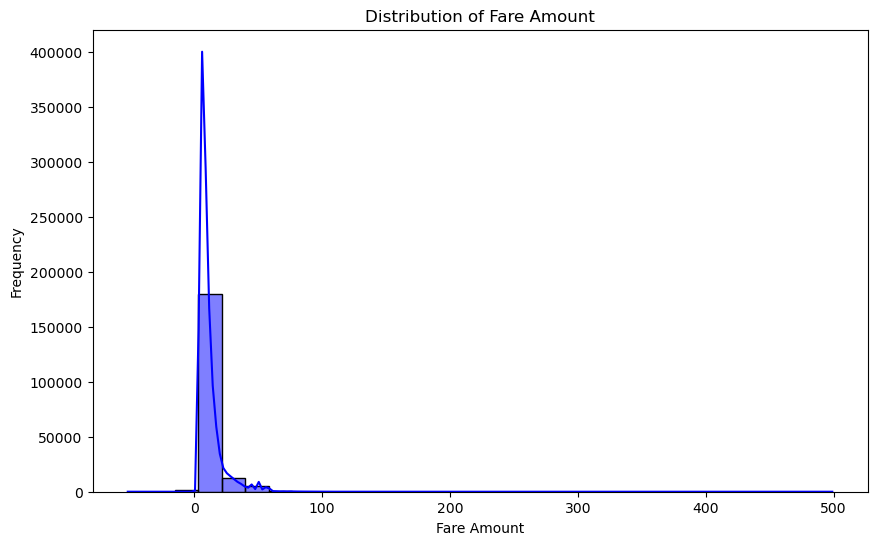

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], kde=True, bins=30, color='blue')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

- The histogram shows that the majority of fare amounts are concentrated between 0 and 20, indicating that most trips are short-distance or low-cost. 
- There are a few outliers with higher fares, suggesting some longer or premium trips, but these are rare.
- The distribution is highly skewed to the right.

### Line Plot: Average Fare by Hour of the Day

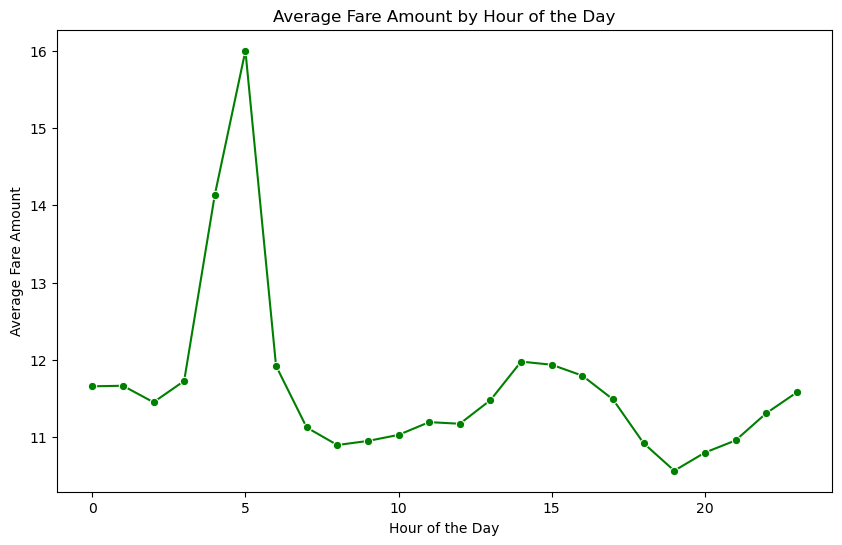

In [16]:
hourly_fare = df.groupby('hour')['fare_amount'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_fare, x='hour', y='fare_amount', marker='o', color='green')
plt.title('Average Fare Amount by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare Amount')
plt.show()

- The line plot shows a significant spike in average fare amounts around 5 AM, likely due to early morning travel demand (e.g., airport trips).
- Fares are lower during late night and midday but gradually rise in the evening, possibly due to rush hour or increased demand.








### Box Plot: Fare Amount by Passenger Count

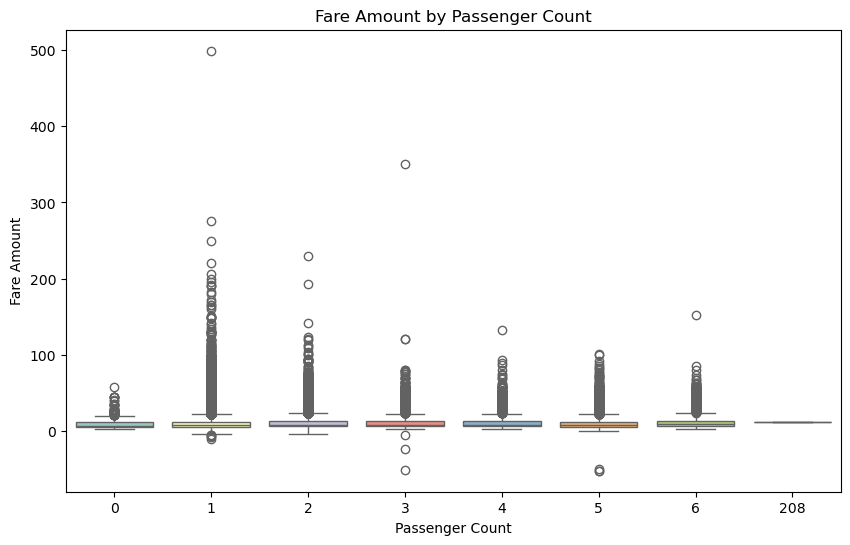

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='passenger_count', y='fare_amount', palette='Set3')
plt.title('Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.show()

- The passenger count for 1 person is high with high fare amount

### Creating a Correlation Heatmap

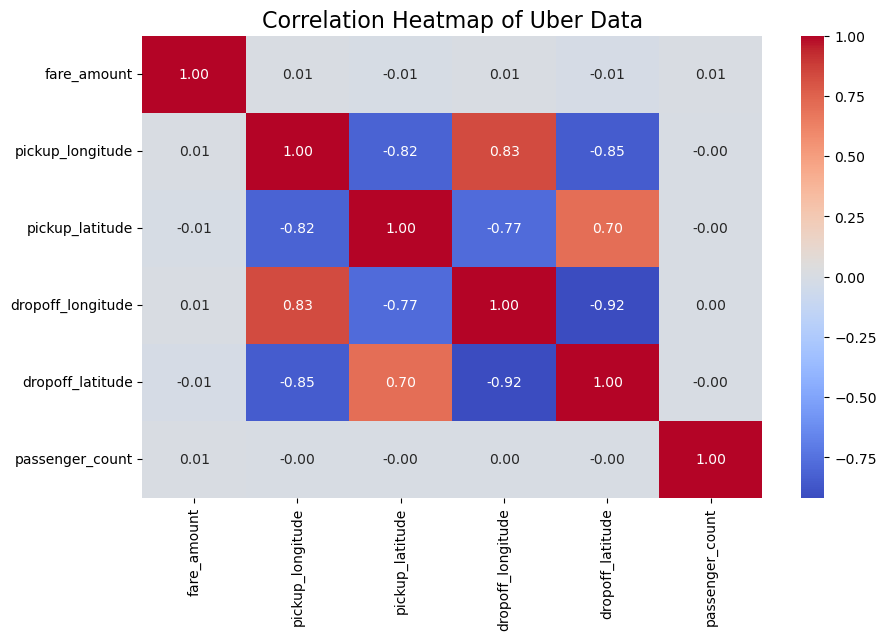

In [18]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Uber Data", fontsize=16)
plt.show()

- There are weak correlations between the fare and most of the features, indicating that fare is not strongly dependent on any specific feature from the data.
- Pickup and dropoff locations have strong negative correlations with their respective latitudes and longitudes, likely due to the way coordinates are spread geographically.
- Time features like year, month, weekday, and hour do not have significant correlation with the fare amount.

### Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

**defining predictor variance for the regression model**

In [20]:
X = df.drop(columns = ['fare_amount'],axis=1)
y = df['fare_amount']

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=45)

In [22]:
len(X_train), len(X_test), len(y_train),len(y_test)

(134000, 66000, 134000, 66000)

### Standardization

In [23]:
from sklearn.preprocessing import StandardScaler

- Standardization is used to transform data into a standard normal distribution, ensuring that all features are on the same scale.

In [24]:
# Standardize numerical features (mean=0, std=1) for better model performance.

scalar = StandardScaler()
scaled_X_train = scalar.fit_transform(X_train)
scaled_X_test = scalar.fit_transform(X_test)